In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "gulim")
plt.rc('axes', unicode_minus = False)

In [49]:
iris_df = sns.load_dataset("iris")
iris_df.head()
#iris_df.info()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X = iris_df.iloc[:, :-1] #loc 는 반드시 변수명을 알아야함
y = iris_df.iloc[:, -1]  #iloc 는 변수명은 몰라도 여튼 마지막에 있다는건 알 때 유용

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [52]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)

In [53]:
ss = StandardScaler(with_mean = True, with_std = True) #feature 데이터의 특성을 표준화함. 
#ex) 평균 조정 - 각 특성의 평균을 0으로 만듬/ 분산조정 - 분산을 1로 만듬
ss.fit(train_X)
#여기서 fit : train_X 데이터에서 각 특성의 평균과 표준편차를 계산하여 StandardScaler 에 저장. 

print(ss.mean_) #train_X에대한 mean을 구함 
print(ss.scale_)
#----------------------------------------------------
# ^여기까지가 표준화를 위한 준비단계

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)
#transform() : 이것이 실제 변환, -> 표준화하는 단계. 

[5.80833333 3.08916667 3.68666667 1.18583333]
[0.8084536  0.43813922 1.74059058 0.77215023]


In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_y)
print("Train acc = {:.4f}".format(knn.score(train_scaled, train_y)))
print("Test acc = {:.4f}".format(knn.score(test_scaled, test_y)))

Train acc = 0.9583
Test acc = 0.9667


In [55]:
# Attribute
print("classes = ", knn.classes_)
# print("feature names = ", knn.feature_names_in)
print("metric = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)
print("n neighbors = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
metric =  euclidean
sample =  120
n neighbors =  5


In [56]:
# DT decision Tree 

wine = pd.read_csv("https://bit.ly/wine-date")
print(wine.head())
print(wine.info())



   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None


In [57]:
#Dtype 을 int가 float64니까 int 로 바꿔 astype("int32")-> category로 또바꿔
wine["class"] = wine["class"].astype("int32").astype("category")
wine.info()

#위 info()와 class의 Dtype 을 비교해바  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


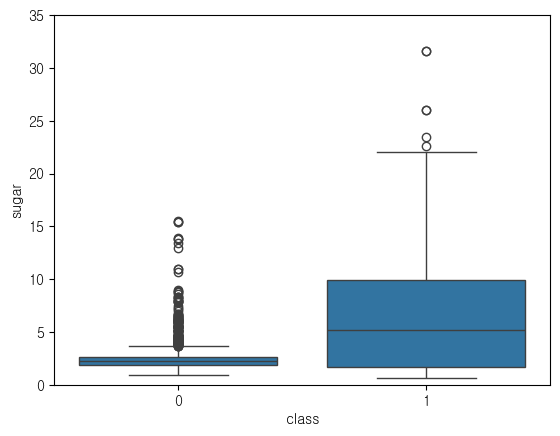

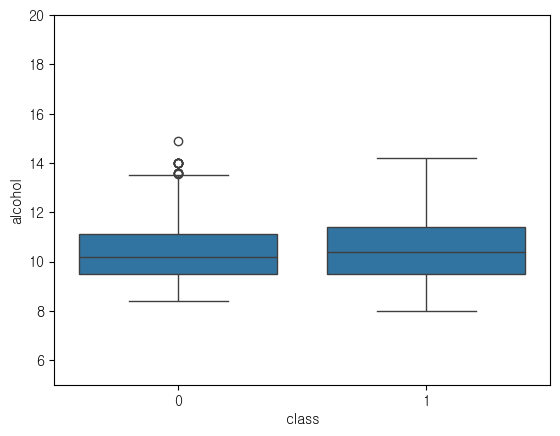

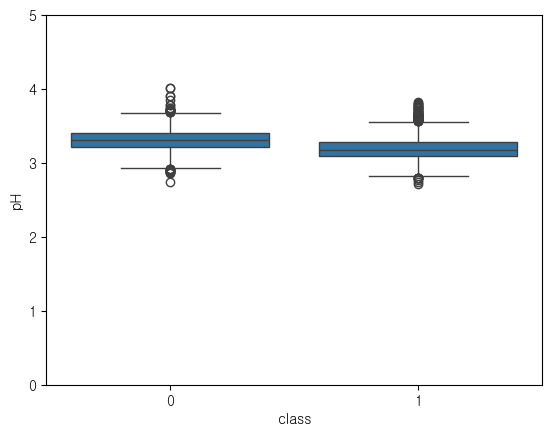

In [58]:
sns.boxplot(wine, x = "class", y = "sugar")
plt.ylim(0, 35)
plt.show()

sns.boxplot(wine, x = "class", y = "alcohol")
plt.ylim(5, 20)
plt.show()

sns.boxplot(wine, x = "class", y = "pH")
plt.ylim(0, 5)
plt.show()

#그래프를 해석해보면, 레드/화이트와인의 차이는 sugar 에서만 차이가 나고 
#alcohol 또는 pH는 별 차이가 없음 따라서 레드/화이트의 구분은 sugar가 키라는것

In [59]:
wine.head() 
X = wine.iloc[:,:-1]
y = wine.iloc[:, -1]

print(X.shape)
print(y.shape)

(6497, 3)
(6497,)


In [60]:
## 데이터를 스플릿해야지 (split 을 매뉴얼로 하면? shuffle 했었쥐)
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)

print("train shape = ", train_X.shape)
print("test shape = ", test_X.shape)

train shape =  (5197, 3)
test shape =  (1300, 3)


In [61]:
## Scaling 
standScaler = StandardScaler()
standScaler.fit(train_X)

print(standScaler.mean_)
print(standScaler.scale_)

train_scaled = standScaler.transform(train_X)
test_scaled = standScaler.transform(test_X)



[10.48823616  5.46706754  3.21838176]
[1.18743806 4.75722931 0.16039271]


In [62]:
## DT

from sklearn.tree import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
#criterion = "gini" 결정트리가 각 노드를 분할할 때 사용할 기준이 gini. 
dt.fit(train_scaled, train_y)

print("Train ACC = ", dt.score(train_scaled, train_y))
print("Test ACC = ", dt.score(test_scaled, test_y))

Train ACC =  0.8714643063305754
Test ACC =  0.8646153846153846


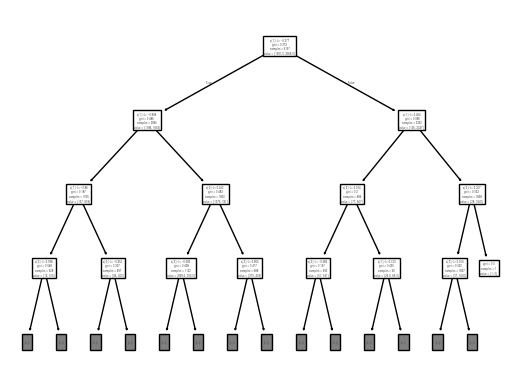

In [64]:
from sklearn.tree import plot_tree

plot_tree(dt, max_depth = 3, filled=False)
plt.show()

# max_depth 외에도 max_leaf_nodes 를 줄 수도 있음 

In [65]:
print(dt.feature_importances_)

pd.DataFrame(dt.feature_importances_, index = train_X.columns)
#변수간의 중요도 - 어떤 변수가 중요한 역할을 했냐? 값이 큰게 가장 큰 역할했다. 

[0.12118945 0.74896106 0.12984949]


,0
alcohol,0.121189
sugar,0.748961
pH,0.129849


In [66]:
## 교차검증 (Cross validation, cv)
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV

In [67]:
cv_X_scaled = ss.fit_transform(X)

In [68]:
print(y.value_counts())

class
1    4898
0    1599
Name: count, dtype: int64


In [69]:
splitter = StratifiedKFold(n_splits=5, shuffle=True)
cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)

In [70]:
cv_result
cv_result["test_score"].mean()
print(cv_result["test_score"].mean())

0.8617824361935217


In [72]:
#GridSearch
dt = DecisionTreeClassifier()

params = {
    "min_impurity_decrease":np.arange(0.001, 0.01, 0.001),
    "max_depth": np.arange(5, 30, 1),
    "min_samples_split": np.arange(2, 100, 10)
}
grid_cv = GridSearchCV(dt,
                       param_grid= params,
                       cv = splitter)

grid_cv.fit(cv_X_scaled, y)
print(grid_cv.cv_results_)

{'mean_fit_time': array([0.00366468, 0.00279579, 0.00312133, ..., 0.00252423, 0.00240479,
       0.0024682 ]), 'std_fit_time': array([0.00054282, 0.00025198, 0.00024239, ..., 0.000631  , 0.0005668 ,
       0.00045407]), 'mean_score_time': array([0.00079765, 0.00091839, 0.00059195, ..., 0.00060477, 0.00061359,
       0.00019975]), 'std_score_time': array([0.00039883, 0.00050855, 0.00048344, ..., 0.00049392, 0.00050121,
       0.00039949]), 'param_max_depth': masked_array(data=[5, 5, 5, ..., 29, 29, 29],
             mask=[False, False, False, ..., False, False, False],
       fill_value=999999), 'param_min_impurity_decrease': masked_array(data=[0.001, 0.001, 0.001, ..., 0.009000000000000001,
                   0.009000000000000001, 0.009000000000000001],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20), 'param_min_samples_split': masked_array(data=[2, 12, 22, ..., 72, 82, 92],
             mask=[False, False, False, ..., False, False, False],
 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [73]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_impurity_decrease', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [74]:
print(grid_cv.best_params_)
print(np.mean(grid_cv.cv_results_["mean_test_score"]))

{'max_depth': np.int64(5), 'min_impurity_decrease': np.float64(0.001), 'min_samples_split': np.int64(2)}
0.8564045615628066


In [75]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV


In [76]:
rf = RandomForestClassifier(n_estimators=100) #criterion="gini" 기본 
#n_estimators=100: 결정트리의 수 지정/ 트리의 수가 많을수록 모델성능안정적


In [77]:
cv_X_scaled = ss.fit_transform(X)
y

print(cv_X_scaled.shape)
print(y.shape)

(6497, 3)
(6497,)


In [78]:
params = {
    "n_estimators": [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle=True) 
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [79]:
print(grid_rf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [80]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_["mean_test_score"])
print(grid_rf.best_score_)

{'max_depth': 15, 'n_estimators': 80}
[0.83146231 0.8183784  0.82176503 0.83223308 0.85762551 0.86101214
 0.86008729 0.86024196 0.87039948 0.87132327 0.86932113 0.8694764
 0.87732599 0.87825049 0.87686469 0.87824966 0.89256387 0.89164067
 0.89333369 0.88856316 0.89210304 0.89625795 0.89410387 0.89441109]
0.8962579499022917


In [81]:
rf_best = RandomForestClassifier(n_estimators=80,
                                 max_depth = 15)
rf_best.fit(cv_X_scaled, y)

RandomForestClassifier(max_depth=15, n_estimators=80)

In [82]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))

[0.23280901 0.51408371 0.25310728]
0.9919963059873788


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gb = GradientBoostingClassifier()

#params = {
#    "n_estimators": [50, 80, 100, 120],
#    "max_depth" : [3, 5, 7, 9, 12, 15]
#}

splitter = StratifiedKFold(n_splits=5, shuffle=True) 
cv_score = cross_validate(gb, cv_X_scaled, y, cv = splitter)
# grid_gb.fit(cv_X_scaled, y)
# print(np.mean(cv_score["train_score"]))
print(np.mean(cv_score["test_score"]))

0.8679393616391307


In [85]:
# print(grid_gb.best_params)
# print(grid_gb.cv_results_["mean_test_score"])
# print(grid_gb.best_score_)

# 결측치 처리 
### dropna(axis = 0, subset = ['날릴거'], inplace=True (저장)) 

In [87]:
titanic = sns.load_dataset("titanic")
titanic.head()
print(titanic.info())
titanic.dropna(axis=0, subset=['age'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [88]:
#dt, rf, gb 세 개 사용해서 survive 예측하기 survived == 1 alive
# scaling 하고 rf 는 scaling 노필요 


X = titanic.loc[:, "pclass":"fare"]
y = titanic.loc[:, 'survived']
X = pd.get_dummies(X, columns = ["sex"], drop_first=True)

#get_dummies : 범주형 데이터를 숫자형 더미변수로 변환 
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [89]:
print(X.shape)
print(y.shape)

(714, 6)
(714,)


# Cross Validation 으로 검증 
## 데이터를 원래는 Train/ Test용으로 나눠야하는데 현실에서는 데이터가 부족하기 때문에 CV 이용. 

In [90]:
# Split 
# train_X, test_X, train_y, test_y = train_test_split(
#     X, y, test_size = 0.2
# )

# print("train shape = ", train_X.shape)
# print("test shape = ", test_X.shape)

In [91]:
# Scaling 
standScaler = StandardScaler()
standScaler.fit(train_X)

print(standScaler.mean_)
print(standScaler.scale_)

train_scaled = standScaler.transform(train_X)
test_scaled = standScaler.transform(test_X)


[10.48823616  5.46706754  3.21838176]
[1.18743806 4.75722931 0.16039271]


In [92]:
#DT 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [93]:
#dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
dt = DecisionTreeClassifier()

params = {
    "max_depth" : range(3, 20, 1),
    "max_leaf_nodes" : range(3, 20, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle = True)
gs_dt = GridSearchCV(dt, param_grid=params, cv = splitter)
gs_dt.fit(X, y)


# dt.fit(train_scaled, train_y)

# print("Train ACC = ", dt.score(train_scaled, train_y))
# print("Test ACC = ", dt.score(test_scaled, test_y))


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [100]:
print("Best parameters = ", gs_dt.best_estimator_)
print("cv score = {:4f}".format(gs_dt.best_score_))

Best parameters =  DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)
cv score = 0.809495


In [101]:
print(dt.feature_importances_)
pd.DataFrame(dt.feature_importances_, index = train_X.columns)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Random Forest 라면끓이는 법 

###
rf = RandomForestClassifier(n_estimators=100)
params = {
    "n_estimators" : range(90, 120, 1),
    "max_depth": range(3, 20, 1)
}

splitter = StratifiedKFold(n_splits = 5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)


In [102]:
rf = RandomForestClassifier(n_estimators=100)
cv_X_scaled = StandardScaler.fit_transform(X)
y
print(cv_X_scaled.shape)
print(y.shape)

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [103]:
params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth": range(3, 20, 1)
}
# n_estimators 범위는 대충 feature 의 10배 정도로 예상  

splitter = StratifiedKFold(n_splits = 5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(cv_X_scaled, y)

ValueError: Found input variables with inconsistent numbers of samples: [6497, 714]

In [221]:
print("Best parameters = ", grid_rf.best_params_)
print("Cv score = ", grid_rf.best_score_)

# print(grid_rf.cv_results_["mean_test_score"])
# print(grid_rf.best_score_)

Best parameters =  {'max_depth': 8, 'n_estimators': 50}
Cv score =  0.740904166256279


##결과가 왜 서로 다를까? 
1) shuffle = True : Bagging 이 달라짐 
2) feature

In [205]:
rf_best = RandomForestClassifier(n_estimators=120,
                                 max_depth = 5)
rf_best.fit(cv_X_scaled, y)

RandomForestClassifier(max_depth=5, n_estimators=120)

In [206]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))

[0.25499119 0.24923812 0.07637508 0.06269824 0.35669738]
0.7759103641456583


In [226]:
# GB
gb = GradientBoostingClassifier()

params = {
    "learning_rate":np.arange(0.1, 1, 0.1), #파이썬 함수는 int만 받아용 float 넣으려면 np.arange()
    "max_depth":range(3, 5, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)

grid_gb = GridSearchCV(gb, param_grid=params, cv = splitter)
grid_gb.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 5)})

In [227]:
print("Best parameters = ", grid_gb.best_estimator_)
print("Cv score = ", grid_gb.best_score_)

Best parameters =  GradientBoostingClassifier(learning_rate=np.float64(0.1), max_depth=4)
Cv score =  0.8234807446075052


## Logistic Regression 

In [229]:
wine = pd.read_csv("https://bit.ly/wine-date")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [233]:
wine['class'] = wine['class'].astype('int32').astype('category')
wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


In [236]:
X = wine.iloc[:, :-1]
y = wine['class']


In [237]:
## 반드시 scale 필요
standScaler = StandardScaler()
X_scaled = standScaler.fit_transform(X) #정규화실행 
X_scaled[:10]  # 무슨뜻? 

array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       [-0.58006813, -0.7447781 , -0.3638682 ],
       [-0.91546416, -0.7447781 ,  1.81308951],
       [-0.91546416, -0.76579782,  1.81308951],
       [-0.91546416, -0.80783726,  0.50691489],
       [-0.41237012, -0.89191614,  1.06670401],
       [-0.83161516, -0.72375839,  0.88010764],
       [ 0.00687492,  0.13805008,  0.81790884]])

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
lr = LogisticRegression(max_iter=100) 
splitter = StratifiedKFold(n_splits=5, shuffle=True)
#얘는 GridSearch할 게 없음 
scores = cross_validate(lr, X_scaled, y, cv = splitter) #cv(모델, feature, y, cv = splitter)

In [241]:
print(scores["test_score"])
    

[0.77615385 0.77230769 0.78983834 0.78444958 0.78214011]


In [242]:
lr.fit(X_scaled, y)

LogisticRegression()

In [245]:
print("probability = \n", lr.predict_proba(X_scaled[:10]))
print("coefficient = \n", lr.coef_, lr.intercept_) #coef 가중치 계수, intercept 절편 출력
print("classes = \n", lr.classes_)

# 값을 보면 array([[0일확률, 1일 확률]이 10개 쭉 나옴])
# feature가 3개라서 R3 (demension 이 3)  

probability = 
 [[0.77202535 0.22797465]
 [0.3608078  0.6391922 ]
 [0.44961173 0.55038827]
 [0.37654449 0.62345551]
 [0.77202535 0.22797465]
 [0.77810814 0.22189186]
 [0.59800521 0.40199479]
 [0.66068716 0.33931284]
 [0.61725242 0.38274758]
 [0.19105714 0.80894286]]
coefficient = 
 [[ 0.53227906  1.65998624 -0.70993564]] [1.79099774]
classes = 
 [0 1]


In [3]:
import os
import pandas as pd

In [25]:
fpath = './dataset/'
fname = 'ThoraricSurgery.csv'
file = os.path.join(fpath, fname)

thoracic_df = pd.read_csv(file, header = None)

thoracic_df = thoracic_df.drop(thoracic_df.columns[0], axis = 1)
thoracic_df.head()
thoracic_df[3] = thoracic_df[3].astype('int32')
thoracic_df[2] = thoracic_df[2].astype('int32')
thoracic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       470 non-null    int64
 1   2       470 non-null    int32
 2   3       470 non-null    int32
 3   4       470 non-null    int64
 4   5       470 non-null    int64
 5   6       470 non-null    int64
 6   7       470 non-null    int64
 7   8       470 non-null    int64
 8   9       470 non-null    int64
 9   10      470 non-null    int64
 10  11      470 non-null    int64
 11  12      470 non-null    int64
 12  13      470 non-null    int64
 13  14      470 non-null    int64
 14  15      470 non-null    int64
 15  16      470 non-null    int64
 16  17      470 non-null    int64
dtypes: int32(2), int64(15)
memory usage: 58.9 KB


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [38]:
rf = RandomForestClassifier(n_estimators=100)
X = thoracic_df.loc[:, :15]
y = thoracic_df.iloc[:, -1]
print(y)
scaler = StandardScaler()
scaler = StandardScaler.fit_transform(X)

0      0
1      0
2      1
3      1
4      0
      ..
465    0
466    0
467    0
468    1
469    0
Name: 17, Length: 470, dtype: int64


TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [30]:
params = {
    "n_estimators" : range(150, 200, 1),
    "max_depth" : range(3, 15, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle = True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(X, y)


KeyboardInterrupt: 